In [4]:
library(dplyr)
library(ggplot2)
library(knitr)


In [7]:
data<-read.csv("/Users/Jlnrd/Desktop/kids/Motion/RESULTS_mean_fd/SummaryRsqs.csv",header = TRUE, sep = ",")
head(data)
attach(data)

,motion_thresh,med_rsq,CI_95,n,age_l,age_u
1,0.0500000,0.7454080,0.2508109,10.0000000,6.0000000,18.0000000
2,0.0500000,0.8674165,0.1107521,20.0000000,6.0000000,18.0000000
3,0.0500000,0.9141269,0.1072097,30.0000000,6.0000000,18.0000000
4,0.05000000,0.93183470,0.08949098,40.00000000,6.00000000,18.00000000
5,0.05000000,0.94563045,0.06992308,50.00000000,6.00000000,18.00000000
6,0.05000000,0.95317142,0.06024247,60.00000000,6.00000000,18.00000000


The following objects are masked from data (pos = 3):

    age_l, age_u, CI_95, med_rsq, motion_thresh, n



In [8]:
#+ "freq_check"
#Check frequencies and distributions
table(data$motion_thresh) 


0.05  0.1 0.15  0.2 0.25  0.3 0.35  0.4 0.45  0.5 0.55  0.6 0.65  0.7 0.75  0.8 
  10   10   10   10   10   10   10   10   10   10   10   10   10   10   10   10 
0.85  0.9 0.95    1 
  10   10   10   10 

In [9]:
table(data$n) #16 for each n


 10  20  30  40  50  60  70  80  90 100 
 40  40  20  20  20  20  20  20  20  20 

Plotting! 

Warning message:
“Removed 40 rows containing missing values (geom_point).”

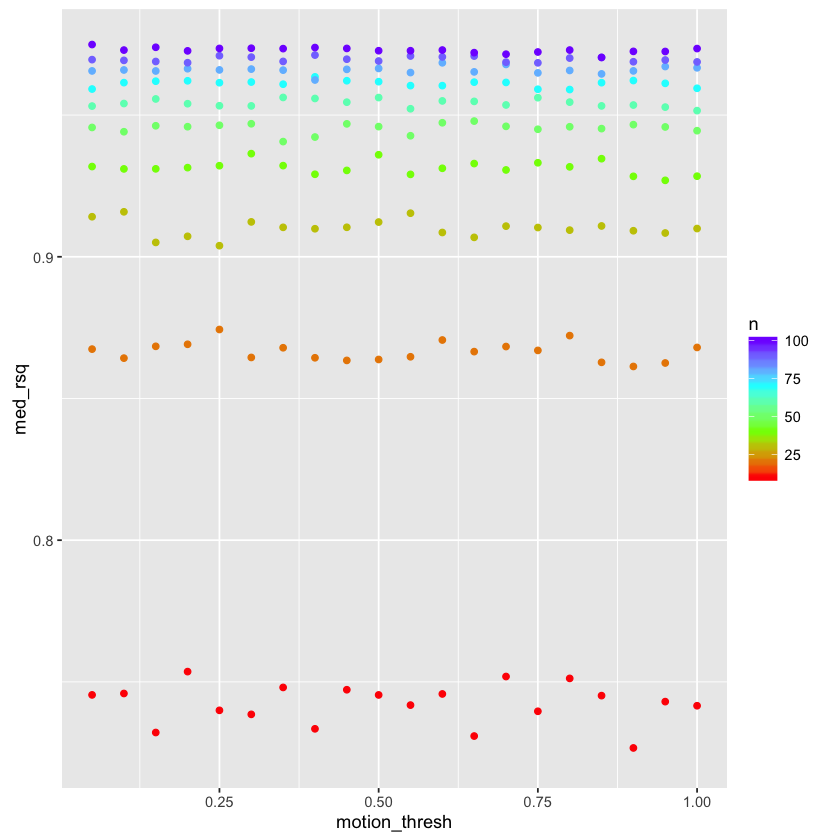

In [10]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n))+geom_point() +scale_colour_gradientn(colours=rainbow(4))

Warning message:
“Removed 40 rows containing missing values (geom_errorbar).”Warning message:
“Removed 40 rows containing missing values (geom_point).”Warning message:
“Removed 40 rows containing missing values (geom_path).”Warning message:
“Removed 40 rows containing missing values (geom_errorbar).”Warning message:
“Removed 40 rows containing missing values (geom_point).”Warning message:
“Removed 40 rows containing missing values (geom_path).”

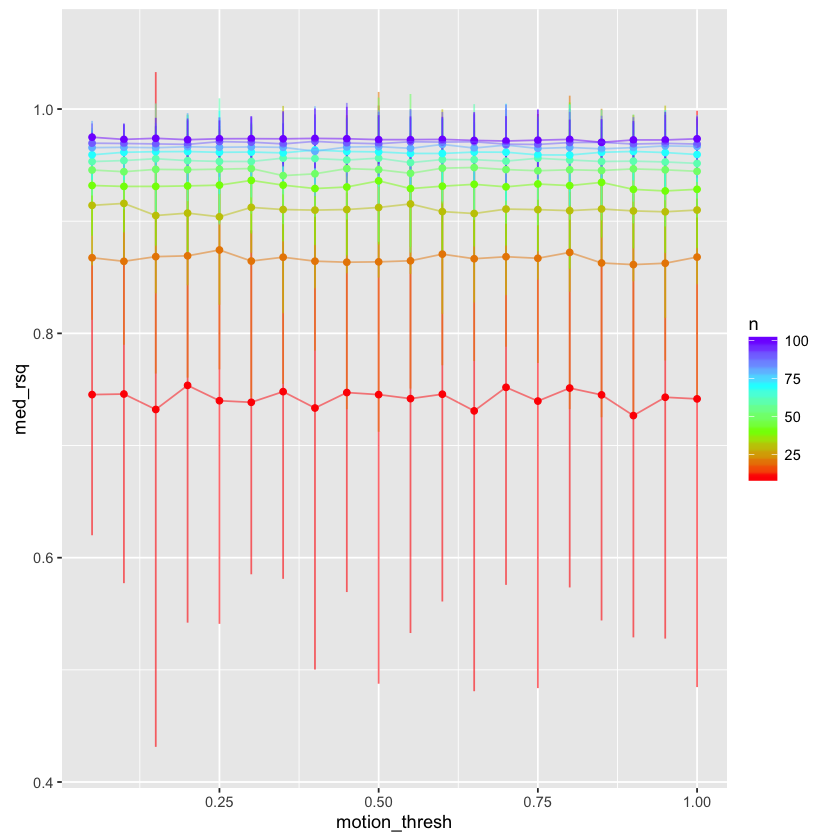

In [11]:
aplot <-ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n)) +scale_colour_gradientn(colours=rainbow(4))+
geom_errorbar(aes(ymin=med_rsq-CI_95/2, 
			  ymax=med_rsq+CI_95/2), 
		      width=0, alpha=.6)+geom_point()+
		geom_line(alpha=.5)


print(aplot)
ggsave(aplot, filename='/Users/Jlnrd/Desktop/mean_by_perc_fd.jpg',  width=6, height=6)#, units='in', dpi=150) 


In [16]:
#ggplot(data, aes(factor(motion_thresh),med_rsq))+ geom_boxplot(aes(fill = factor(n)))


Warning message:
“Removed 40 rows containing missing values (geom_path).”

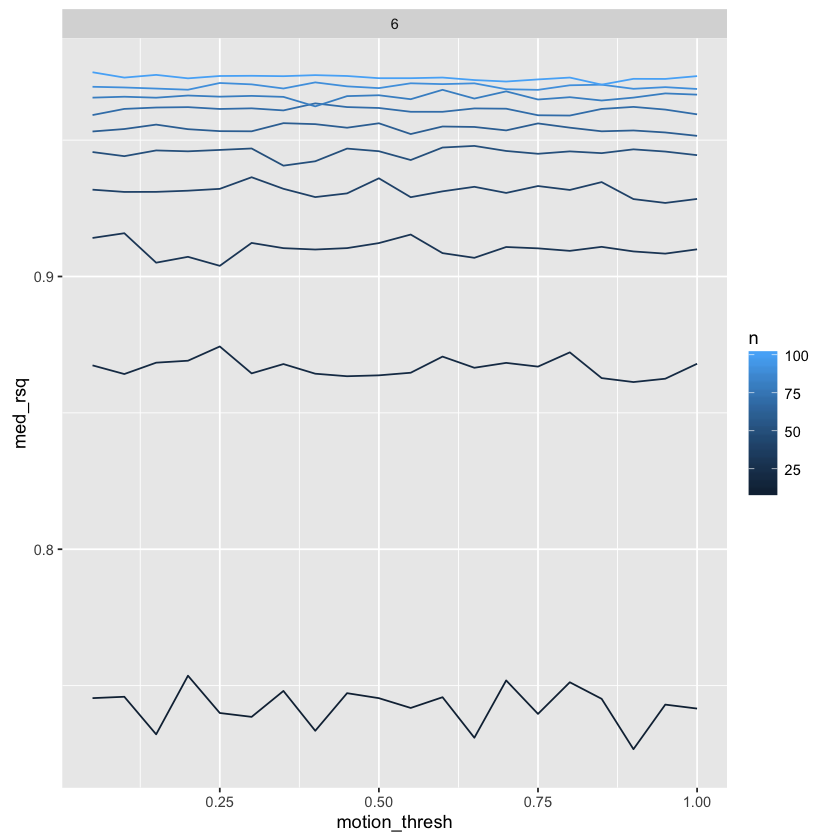

In [12]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n))+geom_line()+facet_grid(~age_l)